# LightGBM
----

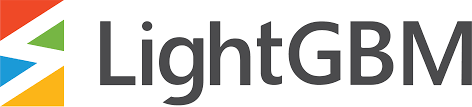

LightGBM은 XGBoost와 함께 부스팅 계열 알고리즘에 각광받는 모델입니다.

XGBoost의 경우도 물론 GBM 보다 학습속도가 빠르지만 GridSearchCH로 하이퍼 파라미터를 튜닝하기에는 매우 많은 시간이 걸린다는 단점이 존재합니다.

LightGBM은 XGBoost와 비교해 큰 예측 성능 차이를 보이지 않으면서 학습 시간을 상당히 단축시킨 모델입니다.

`LightGBM은 이러한 장점을 가지고 있지만 공식 문서에 따르면 일반적으로 10,000 건 이하의 데이터 세트를 다루는 경우 과적합 문제가 발생하기 쉽다는 단점이 있습니다.`

# LightGBM의 트리 분할 방식
---

일반적인 GBM 계열의 트리 분할 방식은 `균형 트리 분할(Level Wise)` 방식을 이용합니다. 이 방법을 이용하면 최대한 균형 잡힌 트리를 생성하면서도 트리의 깊이를 최소화 할 수 있다는 장점이 있습니다. 이러한 방식으로 트리를 생성할 경우 과적합 문제에 더 강하 구조를 갖게 되지만 균형을 맞추기 위한 시간이 필요하다는 단점이 있습니다.


반면 LightGBM의 경우 일반적인 균형 트리 분할 방식과 다르게 `리프 중심 트리 분할(Leaf Wise)` 방식을 이용합니다.

이 방법은 트리의 균형을 맞추지 않고 최대 손실 값(max delta loss)을 가지는 리프 노드를 지속적으로 분할하면서 트리가 깊어지고 비대칭 적인 트리를 만듭니다. 

하지만 이러한 방식으로 트리를 계속해서 분할하게 되면 결국 균형 트리 분할 방식보다 예측 오류 손실을 최소화 한다는 방법을 이용한 것입니다.

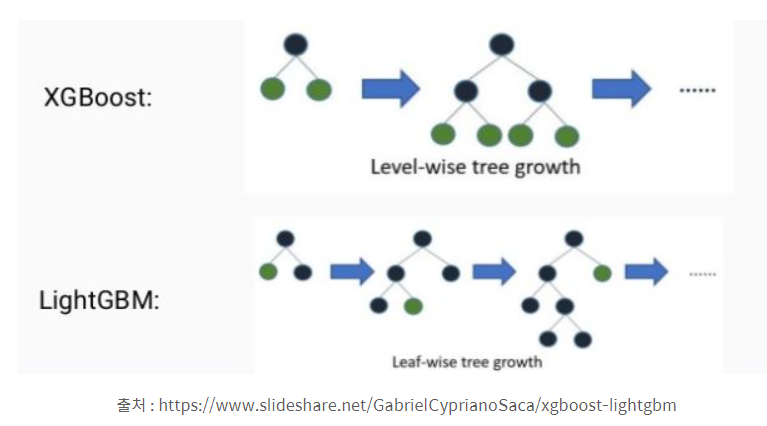

# LightGBM vs XGBoost
---

LightGBM과 XGBoost를 비교했을 때 아래와 같은 장점이 있습니다.

- 빠른 학습 및 예측 수행 시간

- 더 작은 메모리 사용량

- 카테코리형 피처의 자동 변환 및 최적 분할

# LightGBM 의 하이퍼 파라미터
---

앞서 설명했듯이 LightGBM은 리프 중심 트리 분할 방식을 이용해 트리의 깊이가 매우 깊어지기 때문에 max_depth에 대한 파라미터 설정이 중요합니다.



## 주요 파라미터
---

- num_iteration [default=100] : 반복 수행하기 위한 트리의 개수 지정. 크게 지정할수록 예측 성능이 높아질 수 있지만 과적합 문제 가능성 또한 높아짐.
    

- learning_rate [default=0.1] : 0~1 사이의 값을 지정해 부스팅 스텝을 반복적으로 수행할 때 업데이트 되는 학습률 값. 일반적으로 n_estimators를 크게하고 learning_rate을 작게 해서 예측 성능 향상 가능, 과적합 이슈 동반.


- max_depth [default=-1]: 0보다 작은 값을 지정하면 깊이에 제한 없음.


- min_data_in_leaf [default=20] : 결정 트리의 min_samples_leaf와 동일. 최종 결정 클래스인 리프 노드가 되기 위해 최소한으로 필요한 레코드 수. (과적합 방지용)


- num_leaves [default=32] : 하나의 트리가 가질 수 있는 최대 리프 수


- boosting [default=gbdt] : 부스팅 트리를 생성하는 알고리즘 (gbdt:일반적인 그래디언트 부스팅, rf:랜덤포레스트)


- bagging_fraction [default=1.0] : 트리가 커져서 과적합 되는 것을 방지하기 위한 데이터 샘플링 비율.


- feature_fraction [default=1.0] : 개별 트리를 학습할 때 무작위로 선택되는 피처의 비율 (GBM의 max_features와 동일)


- lambda_I2 [default=0.0] : L2 regulation 제어를 위한 값. 피처 개수가 많을 경우 적용 검토. 값이 클수록 과적합 감소 효과


- lambda_I1[default=0.0] : L1 regulation 제어를 위한 값. 과적합 방지용.


## Learning Task 파라미터
---

- objective : 최솟값을 가져야 할 손실함수 정의. (회귀, 분류(다중, 이진) 문제에 따라 지정)

# 하이퍼 파라미터 튜닝 방안
---

num_leaves의 개수를 중심으로 min_child_samples(min_data_in_leaf), max_depth를 함께 조정하는 것이 모델의 복잡도를 줄이는 가장 기본적인 튜닝 방식입니다.

- **num_leaves** 는 개별 트리가 가질 수 있는 최대 리프의 개수를 지정합니다. (LightGBM 복잡도를 제어하는 주 파라미터) num_leaves가 클수록 모델의 깊이가 깊어지므로 모델 정확도가 높아질 수 있지만 과적합 문제가 발생할 확률 또한 높아집니다.


- **min_data_in_leaf(min_child_in_leaf)**는 과적합 개선을 위해 사용되는 주 파라미터로 큰 값을 설정하는 경우 트리가 깊어지는 것을 방지합니다.


- **max_depth**는 명시적으로 트리의 깊이를 제어하는 파라미터 입니다.

# LightGBM - 위스콘신 유방암 예측
---

In [13]:
# LightGBM 임포트
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# 위스콘신 유방암 데이터 로드
dataset = load_breast_cancer()
ftr = dataset.data
target = dataset.target

# LGBM 분류기 객체 생성
lgbm_wrapper = LGBMClassifier(n_estimators=400)

# 학습, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(ftr, target, test_size=0.2)

# 조기 중단 기능에 필요한 파라미터 정의
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose=True)

preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]


# 다양한 오차 측정 지표를 확인하기 위한 함수 정의

from sklearn.metrics import *

def get_clf_eval(y_test, pred=None, pred_proba=None): 
    confusion = confusion_matrix(y_test, pred) 
    accuracy = accuracy_score(y_test, pred) 
    precision = precision_score(y_test, pred) 
    recall = recall_score(y_test, pred) 
    f1 = f1_score(y_test, pred) 
    # ROC AUC 
    roc_auc = roc_auc_score(y_test, pred_proba) 
    
    print('Confusion Matrix') 
    print(confusion) 
    print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f}, f1: {3:.4f}, roc_auc: {4:.4f}'.format( accuracy, precision, recall, f1, roc_auc))
    

# get_clf_eval()를 이용해 사키릿런 래퍼 XGBoost로 만들어진 모델 예측 성능 평가
get_clf_eval(y_test, preds, pred_proba)

[1]	valid_0's binary_logloss: 0.589104
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.524766
[3]	valid_0's binary_logloss: 0.47261
[4]	valid_0's binary_logloss: 0.425121
[5]	valid_0's binary_logloss: 0.388089
[6]	valid_0's binary_logloss: 0.355114
[7]	valid_0's binary_logloss: 0.330691
[8]	valid_0's binary_logloss: 0.304748
[9]	valid_0's binary_logloss: 0.280841
[10]	valid_0's binary_logloss: 0.261753
[11]	valid_0's binary_logloss: 0.242501
[12]	valid_0's binary_logloss: 0.224803
[13]	valid_0's binary_logloss: 0.212188
[14]	valid_0's binary_logloss: 0.201039
[15]	valid_0's binary_logloss: 0.189275
[16]	valid_0's binary_logloss: 0.179566
[17]	valid_0's binary_logloss: 0.169006
[18]	valid_0's binary_logloss: 0.162054
[19]	valid_0's binary_logloss: 0.155306
[20]	valid_0's binary_logloss: 0.150527
[21]	valid_0's binary_logloss: 0.14473
[22]	valid_0's binary_logloss: 0.139627
[23]	valid_0's binary_logloss: 0.135942
[24]	valid_0's binary_logloss

위 LGBM 분류기의 n_estimtor를 400으로 지정했지만 조기중단 기능을 통해 158번째 학습에서 중단된 것을 확인할 수 있습니다.

# LGBM 피처 중요도 시각화
---

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

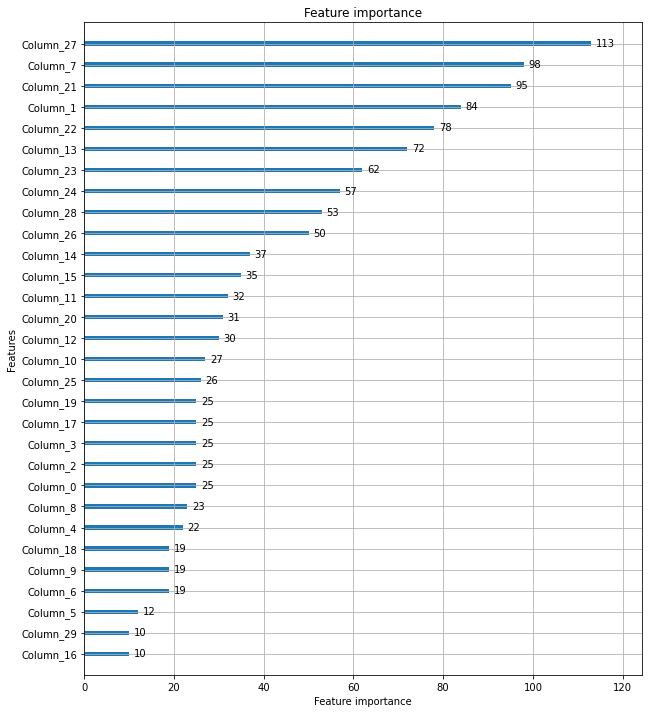

In [14]:
# plot_importance() 를 이용한 피처 즁요도 시각화

from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax=ax)